# Decomposition Workshop

#### Mateus Augusto Schneider Castilhos<sup>1,3</sup>, Carina Marconi Germer<sup>2</sup>, Ellen Pereira Zambalde<sup>1,3</sup>, Leonardo Abdala Elias<sup>1,3</sup>

<sup>1</sup> Department of Electronics and Biomedical Engineering, School of Electrical and Computer Engineering, University of Campinas, Campinas, SP, Brazil.

<sup>2</sup> Department of Biomedical Engineering, Federal University of Pernambuco, Recife, PE, Brazil.

<sup>3</sup> Neural Engineering Research Laboratory, Center for Biomedical Engineering, University of Campinas, Campinas, SP, Brazil.

In [1]:
# Identifying if the code is running on Google Colab
if 'google.colab' in str(get_ipython()):
    # Cloning the repository if running on Google Colab
    !git clone -l -s https://github.com/MateusASchneiderCastilhos/EMG_Crosstalk_Decomposition_Workshop cloned-repo
    %cd cloned-repo

# Importing the necessary dependencies to execute the actual Python script
import numpy as np
from dependencies import decompWorkshop as decW

## Blind Source Separation (BSS)

&emsp;&ensp; The blind source separation (BSS) problem is one of the most debated topics in the signal processing area. These methods aim to find the source signals, $s_j(t); j=[1,2,...,N]$, solely by utilizing their observed signals, $x_i(t)$, where $i=[1,2,...,M]$, generated by a mixing system, $𝑯$, applied to the source signals. However, in practical situations, neither the source signals nor the mixing system are known. This turns the problem into a very complicated one. BSS techniques apply estimation methods to the observation signals $x_i(t)$ with very few assumptions about the source signals to extract them [(COMON; JUTTEN, 2010)](#scrollTo=references). The cocktail party problem is introduced below to better understand the issue.

### Cocktail Party Problem

&emsp;&ensp; The cocktail party problem involves finding the speech signals of people in the same room by recording the mixture of these signals using microphones, [Figure 1](#figure_1). It's worth noting that this problem is closely related to BSS. Considering discrete-time $k$ for sampled data, the source signals $s_1(k), s_2(k), s_3(k)$ are the speech signals, and the observation signals $x_1(k), x_2(k), x_3(k)$ are the audio signals recorded by the microphones located in different coordinates of the space. The mixing system $𝑯$ represents the space of the room and is responsible for weighting each $j$ source signal based on the distance this signal travels to the microphone, but no information is known about how this weighting is done. The speech signals that are reflected by the walls take more time to reach the microphone, so they are delayed versions of the source signals that are recorded. The delay effect can also be represented by $𝑯$. Considering all these conditions and the fact that the source signals are not known, and neither are the weights of $𝑯$, it is clear that this is not an easy problem to solve. Using the previous thought, it is possible to relate the BSS to the decomposition process of the EMG. It's easy to note that for this situation, the source signals $s_j(k)$ are the motor unit action potential (MUAP) trains, the observation signals $x_i(k)$ are the EMG signals in each $i$ channel, and the mixing system $𝑯$ is the conductor volume between the source signals generator (MUs) and the electrodes.

<a name='figure_1'></a>
<figure align="center"><img src="https://drive.google.com/uc?export=view&id=1Rc9wvjVS79jmg5SoeSdHnqdwcsIypaez" width="500"/><figcaption align = "center"> Figure 1 - Cocktail party problem scheme with three source and observation signals.</figcaption></figure>

### Mathematical Contextualization

&emsp;&ensp; Considering the example of the [cocktail party problem](#scrollTo=JLGid-CiRwZ7) and the simplest mixing system, i.e., $𝑯$ being a $3\times3$ constant matrix, the observation signals can be expressed as a linear combination of the source signals, [Equation 1](#eq1), or as in matrix form, [Equation 2](#eq2), where $𝒙(k) = \left[ \begin{array}{c} x_1(k) & x_2(k) & x_3(k) \end{array} \right]^T$ and $𝒔(k) = \left[ \begin{array}{c} s_1(k) & s_2(k) & s_3(k) \end{array} \right]^T$. So, if we find $𝑯$, we can find the source signals. Then, assuming that $𝑯$ has an inverse matrix, to obtain the original sources we need to find the inverse matrix $𝑯^{-1}$. However, this is not easy as it looks like, because since there is no knowledge about the coefficients of $𝑯$ its inverse can't be found. Hence, the methods of BSS search for a matrix $𝑩$ that better represents the inverse matrix $𝑯^{-1}$ using estimation and information theories as is shown in the next sections. 

<a name="eq1"></a>
$$\begin{array}{cc} x_1(k) = h_{11} s_1(k) + h_{12} s_2(k) + h_{13} s_3(k) & \\ x_2(k) = h_{21} s_1(k) + h_{22} s_2(k) + h_{23} s_3(k) & (1) \\ x_3(k) = h_{31} s_1(k) + h_{32} s_2(k) + h_{33} s_3(k) \end{array}$$
<br></br>
<a name="eq2"></a>
$$\begin{array}{ccc}𝒙(k)=𝑯𝒔(k), & 𝑯=\begin{bmatrix} h_{11} & h_{12} & h_{13} \\ h_{21} & h_{22} & h_{23} \\ h_{31} & h_{32} & h_{33} \end{bmatrix} & (2) \end{array}$$

&emsp;&ensp; From now, the observation and source signals can be seen as random variables. For each instant of discrete-time $k$, $x_i(k)$ and $s_j(k)$ represent one realization of the random variable, so the time index can be dropped, which implies that $𝒙$ is a random vector with random variables $x_i$. Note that the boldface letters represent vectors and matrices.

&emsp;&ensp; Some considerations about the BSS problem:

1. The variances (energies) of the source signals can't be determined. As there is no knowledge about the mixing matrix $𝑯$ and the sources $s_j, j=1,...,M$, if the source $s_j$ is multiplied by a constant $\alpha_j$, a scale factor of $1/\alpha_j$ may be presented by multiplying the elements of $𝑯$ (column $j$) [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). So, to solve the problem of finding the source signals, it is assumed that these signals have unit variance ($E\{s_j^2\}=1$, where $E\{\cdot\}$ is the expectation operator). This condition is used in the applied optimization procedures as a constraint to extract the sources. Note that the uncertainty of the multiplying signal ($\alpha_j = \pm1$) is presented here, i.e., we can estimate the source but we can't know if the estimation is a positive or negative version of the original source. However, this signal ambiguity is insignificant in most applications [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references).

2. The order of occurence of the source signals can't be determined. As before, not knowing the mixing matrix $𝑯$ and the sources $s_j, j=1,...,M$, it is possible to change the order of the elements in $𝒔$ and adopt any of them as the first one. Formally, a permutation matrix $𝑷$ and its inverse can be introduced in [Equation 2](#eq2) as $𝒙=𝑯𝑷^{-1}𝑷𝒔$, where $𝑷𝒔$ are the original sources in another order, and $𝑯𝑷^{-1}$ is just a new unknown mixing matrix that should be estimated [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references).

3. Usually, when the number of sources are less or equal to the number of observations ($N \leq M$), it is possible to estimate the mixing matrix, and consequently its inverse. However, when $M < N$, the mixing matrix is not invertible, and the problem of extracting the sources becomes different from the problem of estimating the mixing matrix [(COMON; JUTTEN, 2010)](#scrollTo=references). When this occurs, the sources can be estimated by iteratively executing an optimization algorithm, and the column vectors used to find these sources can be used as columns of the estimated $\widehat{𝑯}^{-1}$. The matrix $𝑩$ is referred to as the separation matrix because it provides the estimated source signals. When the mixing matrix $𝑯$ is squared, the separation matrix can be interpreted as the inverse of its estimation ($𝑩=\widehat{𝑯}^{-1}$).

&emsp;&ensp; BSS methods rely on certain assumptions about the source signals to determine the appropriate method for solving the problem. Surprisingly, the assumption that the source signals $s_j$ (remember, modeled as random variables) are statistically independent of each other, and their probability distribution is not Gaussian, is sufficient to extract the sources (or to estimate $𝑯^{-1}$). These assumptions lead to the Independent Component Analysis (ICA) methods. ICA is one of the most widely used methods for solving BSS problems due to its generality. Before delving into ICA, it's crucial to grasp another technique named Principal Component Analysis (PCA) because it serves as a significant pre-processing step for ICA.

## Principal Component Analysis (PCA)

&emsp;&ensp; Principal Component Analysis (PCA) is a classic technique in statistical data analysis, feature extraction, and data compression. This technique is typically applied to a set of multivariate measurements in which the data exhibit some redundancy, and this redundancy in PCA is measured by second-order statistics, i.e., covariances [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). The aim of PCA is to find a representation of the data with as little redundancy as possible. In other words, PCA attempts to maximize the decorrelation of the data. This procedure may involve dimension reduction (or not). Dimension reduction reinforces the influence of the most significant components that generate the dataset (called principal components) and diminishes the influence of the least significant components [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references).

&emsp;&ensp; To illustrate how PCA works, consider two random variables $s_1$ and $s_2$ (source signals), where $s_1$ is a gamma random variable with a zero mean and a variance equal to 7.5, and $s_2$ is a Laplacian random variable with a zero mean and unit variance. Their joint distribution is plotted below. Remember, here we know the sources a priori just as an example to show the performance of the PCA method and compare it to the "original" sources. The aim here is to understand the steps of PCA and why Whitening is an important pre-processing step for ICA.

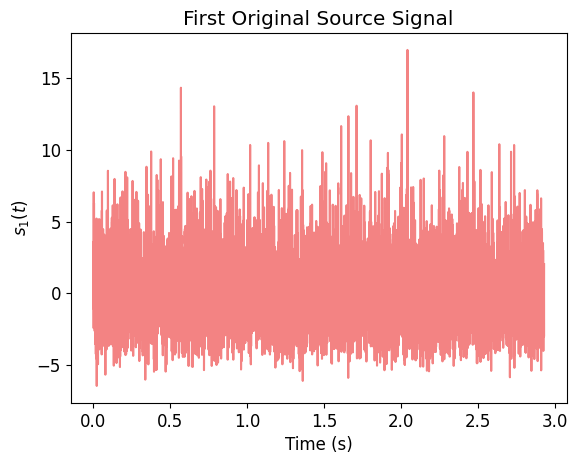

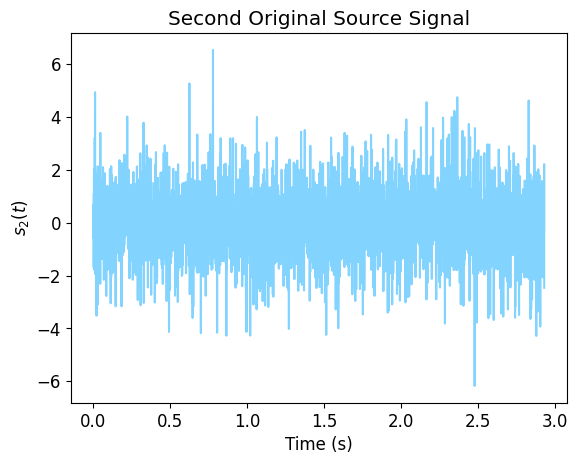



	 Mean and Standard Deviation - Original Source Signals
	Mean s1 =  0.0 		Std s1 =  2.689
	Mean s2 =  -0.01 		Std s2 =  0.991 





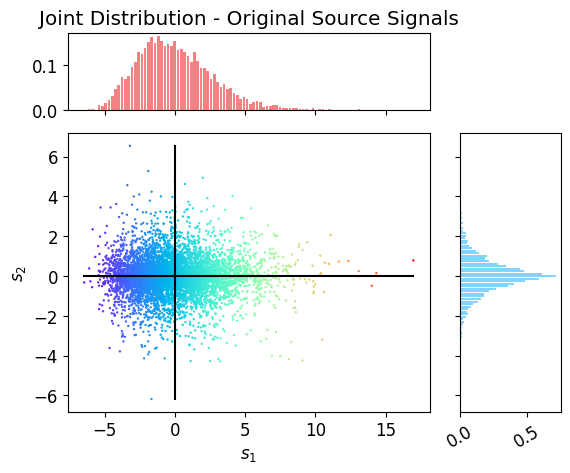

In [2]:
# Getting the source signals
# Uniform random source with null mean and unit variance
# s1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=6000)

# Gamma random source with null mean and variance equals 7.5
s1 = np.random.gamma(7.5, size=6000)
s1 -= s1.mean()

# Normal random source with null mean and variance equals 0.25 
# s1 = np.random.normal(scale=0.5, size=6000)

# Laplacian random source with null mean and unit variance
s2 = np.random.laplace(scale=0.5 ** (0.5), size=6000)

# Normal random source with null mean and unit variance
# s2 = np.random.normal(size=6000)

# Plotting the time series
decW.plot_sources_time_domain(s1, s2, "First Original Source Signal", "Second Original Source Signal",  sampling_frequency = 2048)

# Plotting their joint distribution
decW.plot_sources_and_observations(s1, s2, "Joint Distribution - Original Source Signals", "sources")


&emsp;&ensp; So, considering a mixing process expressed by Equation 2, where now $𝑯=\begin{bmatrix} 2 & 3 \\ 2 & 1 \end{bmatrix}$ (just an example, because in practical situations, we don't know $𝑯$), the joint distribution of the observations is plotted below. You can change the values of $𝑯$ to see how the correlations change. Note that the two main variations of the data are not along the coordinate axes anymore, but rather along the directions of the columns of $𝑯$, i.e., in the directions of the vectors $𝒉_1 = \begin{bmatrix} 2 & 2 \end{bmatrix}^T$ and $𝒉_2 = \begin{bmatrix} 3 & 1 \end{bmatrix}^T$. The vector scale in the chart is larger for better visualization.

&emsp;&ensp; *Note*: If you choose any diagonal matrix, the observation signals in the linear system in [Equation 1](#eq1) won't be a linear combination of $s_1$ and $s_2$, instead $x_1$ and $x_2$ will be equal to one of the two sources scaled by the correspondent element in $𝑯$ matrix. So, the observations will be independent, consequently uncorrelated, hence the PCA method "won't do anything", because, as it was said, to apply the PCA some redundancy needs to exist [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). Actually, the PCA steps will work correctly, but it will result in the same observation signals, because the initial signals are maximally uncorrelated.

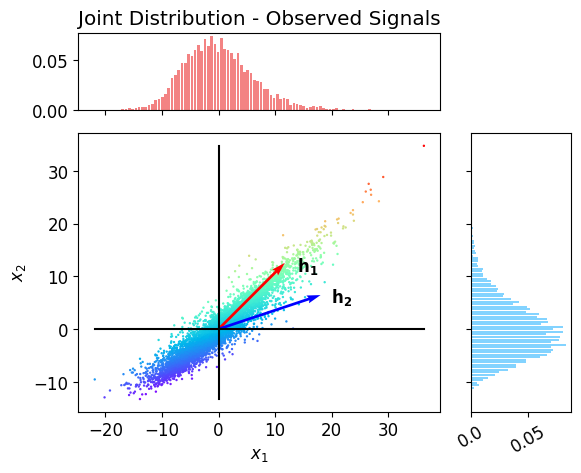



	 Covariance Matrix - Observed Signals
		 [37.331 31.582] 
		 [31.582 29.76 ]


In [3]:
# Defining the mixing matrix H (you can change it and set new values)
H = np.array(
    [[2, 3], 
    [2, 1]],
    dtype=int)

# Doing the matricial multiplication x=Hs and plotting their joint distribution
x = np.dot(H, np.array([s1, s2]))
x1 = x[0,:]
x2 = x[1,:]

# Covariance matrix with three decimal points
covX = np.around(np.cov(x),3)

decW.plot_sources_and_observations(x1, x2, "Joint Distribution - Observed Signals","observations",H=H)
print("\n\n\t Covariance Matrix - Observed Signals\n\t\t",covX[0],"\n\t\t",covX[1])

&emsp;&ensp; Looking at the previous image, we can see by the values of the axis and the distribution of the data that the values are varying more along the $x$ axis than the $y$ axis. Better, if we look carefully, the greater variance of the data is in a direction between $𝒉_1$ and $𝒉_2$. So, if we align the direction of this maximum variance to the direction of one of the axes, the new coordinate system could be represented by the vectors $(𝒖_1,𝒖_2)$ as the image below. We need to find the orthogonal transformation to rotate the data and to represent it in this new coordinate system. This is the central idea of the PCA; the PCA will search in the data for the direction that corresponds to the **maximum data variance** and then it will search for an orthogonal direction that corresponds to the second maximum variance, and so on. The PCA will find $M$ orthogonal directions, where $M$ is the number of dimensions of the data (here 2, but for our EMG data, it is 64 as our HD-EMG contains 64 electrodes in the flexible matrix). But if dimension reduction is used, the PCA will find the most $M-P$ relevant directions, where $P$ is the number of dimensions to ignore/remove.

&emsp;&ensp; After finding the directions, the PCA multiplies the data array $𝒙 = \begin{bmatrix} x_1 & x_2 \end{bmatrix}^T$ by the orthogonal matrix $𝑼 = \begin{bmatrix} 𝒖_1 & 𝒖_2 \end{bmatrix}$, yielding an orthogonal projection of the data in the coordinate system defined by the vectors in $𝑼$ (effectively rotating the data distribution) [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). The orthogonal projections of the data result in another set of random variables, $x_1^{PCA}$ and $x_2^{PCA}$. These variables are the principal components of the data, where $x_1^{PCA}$ is the first principal component (having the maximum variance), and $x_2^{PCA}$ is the second principal component, which is uncorrelated with the first as much as possible.

&emsp;&ensp; **Note:** If you wish to see the values of the covariance matrix of $x_1$ and $x_2$, remove the $\it{\#}$ symbol (commented code) from the line "```print("\n\n\t Covariance Matrix Before PCA\n\t\t", covX[0], "\n\t\t", covX[1])```" and run the code cell below.


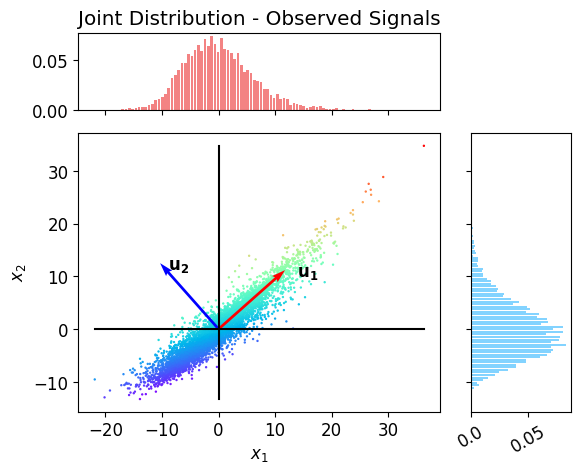

In [4]:
decW.plot_sources_and_observations(x1, x2, "Joint Distribution - Observed Signals","observations",eigen=True)

# To see the values of the covariance matrix, remove the line comment below
# print("\n\n\t Covariance Matrix Before PCA\n\t\t", covX[0], "\n\t\t", covX[1])

&emsp;&ensp; The question now is **how to find the orthogonal vectors?** Before searching for these vectors, the observation vector $𝒙 = \begin{bmatrix} x_1 & x_2 \end{bmatrix}^T$ must be centered, i.e., we subtract its mean value from the respective observation variable, [Equation 3](#eq3). This helps simplify the computation of the second-order statistics that PCA uses. So, the orthogonal vectors $𝒖_i$ can be found from the covariance matrix $𝑪_x$ of the centered observations. It is well-known from linear algebra that these vectors are the eigenvectors of $𝑪_x$ (with unit norm), and the eigenvalues $d_i$, [Equation 4](#eq4), are the variances [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references), where $𝑫$ is a diagonal matrix. Remember, since $𝑼$ is an orthogonal matrix, it satisfies $𝑼^T = 𝑼^{-1}$. The ordering of the eigenvectors $𝒖_1$ and $𝒖_2$ is such that the corresponding eigenvalues $d_1$ and $d_2$ satisfy $d_1 > d_2$. So, $𝒖_1$ corresponds to the direction with the maximum variation of the data ($\sigma_1^2 = d_1$), leading to the first principal component, and so on. Hence, to find the principal components or the representation with as little correlation as possible, we only need to perform a matrix multiplication as in [Equation 5](#eq5). See this implementation in the code cell below.

<a name="eq3"></a>
$$\begin{array}{cc}𝒙 \gets 𝒙 - E\{𝒙\} & (3) \end{array}$$
<br></br>
<a name="eq4"></a>
$$\begin{array}{cccc}𝑪_x = 𝑼 𝑫 𝑼^T, & 𝑫 = \begin{bmatrix} d_1 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & d_m \end{bmatrix},& 𝑼 = \begin{bmatrix} 𝒖_1 & ... & 𝒖_m \end{bmatrix} & (4) \end{array}$$
<br></br>
<a name="eq5"></a>
$$\begin{array}{cc}𝒙^{PCA} = 𝑼^T 𝒙\ & (5) \end{array}$$



	 Covariance Matrix After PCA
		 [ 1.738 -0.   ] 
		 [-0.    65.354]


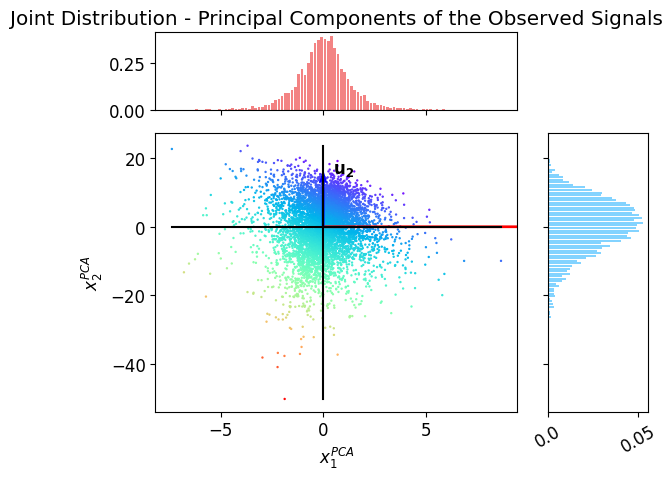

In [5]:
# Centering the observations (making their mean zero)
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
x = np.array([x1, x2])

# Eigenvalue and Eigenvector Decomposition
Cxx = np.cov(x)
d, U = np.linalg.eigh(Cxx)
D = np.diag(d)

# Applying PCA to the observations
x_pca = np.dot(U.T, x)

# Covariance matrix
covX_pca = np.around(np.cov(x_pca),3)
print("\n\n\t Covariance Matrix After PCA\n\t\t", covX_pca[0], "\n\t\t", covX_pca[1])

# Plotting the new uncorrelated observations x1_pca and x2_pca
decW.plot_sources_and_observations(x_pca[0, :], x_pca[1, :], "Joint Distribution - Principal Components of the Observed Signals", "observations PCA", eigen=True)

&emsp;&ensp; From the covariance matrix, it is possible to conclude that the new random variables are uncorrelated since the values of the secondary diagonal are null. So, based on the generated charts before, we can say that **PCA aims to obtain an orthogonal transformation that rotates the joint distribution of the data, creating a new joint distribution where the new random variables are correlated as minimally as possible (minimizing redundancy)**. This objective is achieved by maximizing the variances of the principal components. Therefore, the data are represented in a coordinate system where the maximum joint variances of the data align with the axes.

&emsp;&ensp; If independence can be seen as the lack of redundancy and PCA aims to reduce redundancy, why can PCA not be used to estimate the sources? The answer is that PCA uses covariances, which, informally, can be seen as a weak measure of independence.

### Whitening

&emsp;&ensp; Remember that in [mathematical contextualization](#scrollTo=rX0pSaXab7iD), we mentioned that one of the indeterminacies of the BSS problem is that the variances (energies) of the source signals can't be determined, and we assume they are equal to one. Another pre-processing step that simplifies the computations in ICA is the normalization of the variances of the principal components ($𝒙^{PCA}$), i.e., to make the variances equal to one. This is done by the Whitening process since a white random variable has zero mean and unit variance.

&emsp;&ensp; This is just a scaling problem and is solved based on the variance property $E\{(\alpha x_i)^2\} = \alpha^2E\{x_i^2\}$, where the mean of the random variable $x_i$ is null. So, if $x_i$ has a variance equal to $\sigma_i^2$, to make it equal to one, we need to divide the samples of $x_i$ by its standard deviation (if $\alpha = 1/\sqrt{\sigma^2}$, so $E\{(\alpha x_i)^2\} = E\{x_i^2\}/\sigma^2 = 1$). Moreover, as we mentioned previously, the eigenvalues $d_i$ are the variances of the $x_i^{PCA}$ variables, so we need to multiply the principal components by the corresponding $1/\sqrt{d_i}$ scaling factor. Hence, considering the eigenvalues matrix $𝑫$ in [Equation 4](#eq4), we just need to find the inverse square root $𝑫^{-\frac{1}{2}}$ of the matrix and then multiply $𝒙^{PCA}$ by it, as in [Equation 6](#eq6). See the implementation in the code cell below. Note that the covariance matrix is equal to the identity matrix.

<a name="eq4"></a>
$$\begin{array}{ccc}𝒙^{White} = 𝑫^{-\frac{1}{2}}𝒙^{PCA}, & 𝑫^{-\frac{1}{2}} = \begin{bmatrix} d_1^{-\frac{1}{2}} & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & d_m^{-\frac{1}{2}} \end{bmatrix} & (6) \end{array}$$



	 Covariance Matrix After Whitening
		 [ 1. -0.] 
		 [-0.  1.]


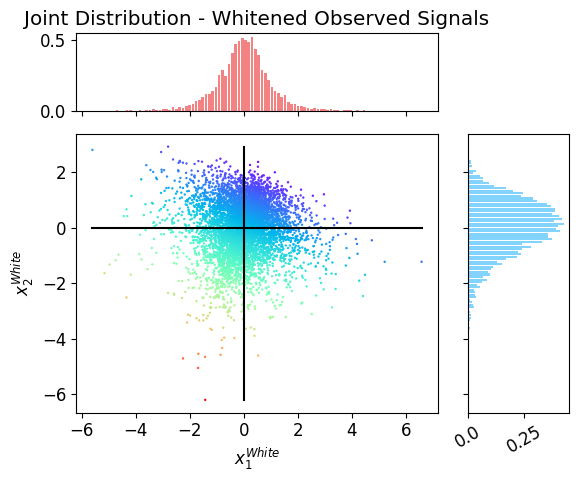

In [6]:
# Computing the D^-0.5 matrix
D_inv_sqrt = np.sqrt(np.linalg.inv(D))

# Normalizing variances of the principal components
x_white = np.dot(D_inv_sqrt, x_pca)

# Covariance matrix
covX_white = np.around(np.cov(x_white),3)
print("\n\n\t Covariance Matrix After Whitening\n\t\t", covX_white[0], "\n\t\t", covX_white[1])

decW.plot_sources_and_observations(x_white[0,:], x_white[1,:], "Joint Distribution - Whitened Observed Signals", "observations White")

&emsp;&ensp; **Note**: _**The PCA method is responsible for making the observations as uncorrelated as possible, while the whitening redistributes the data to achieve unit variance for each uncorrelated component (Note the scale)**_.

&emsp;&ensp; As observed, the orthogonal matrix $𝑼$ rotates the data. Therefore, after normalizing the variances, we can rotate the data again using $𝑼𝒙^{White}$ to return to the [initial coordinate system](#scrollTo=VQ2oBe1eRwaA). Subsequently, after performing PCA and whitening, the statistics (mean and covariance) of the data and their "spatial" distribution are transformed while maintaining the representation in the original coordinate system. Upon returning to the initial coordinate system, note from the charts generated below that the variables $x_i^{White}$ are not equal to the original $s_i$, but their joint distribution is similar, differing only in a rotation angle. This is where ICA comes into play. ICA is responsible for finding the orthogonal matrix that performs the last rotation and estimates the original sources, aiming to achieve statistical independence. PCA cannot find the sources because it uses second-order statistics, which is not the best way to measure independence, while ICA employs stronger concepts such as mutual information.

&emsp;&ensp; **Obs.**: _**Note the importance of PCA and whitening methods as a pre-processing step to ICA. After applying these methods, ICA only needs to find an orthogonal matrix $𝑩$, and being orthogonal implies $𝑩^T=𝑩^{-1}$, i.e., ICA needs to find almost half of the elements of $𝑩$ instead of finding all elements of $𝑯^{-1}$, where $𝑩=\widehat{𝑯^{-1}}$. This is the reason why some authors say that PCA reduces the ICA problem by half**_.

&emsp;&ensp; Hence, combining all the previous steps, we can define the final equation that describes both PCA and whitening, as expressed in [Equation 7](#eq7), where $𝒛$ is the whitened (uncorrelated) observation matrix, and from now on will be named the whitened (or observation) matrix.

<a name="eq7"></a>
$$\begin{array}{ccc}𝒛 = 𝑾 𝒙, & 𝑾 = 𝑼 𝑫^{-\frac{1}{2}} 𝑼^T = 𝑪_x^{-\frac{1}{2}} & (7) \end{array}$$



	 Covariance Matrix After Whitening
		 [ 1. -0.] 
		 [-0.  1.]


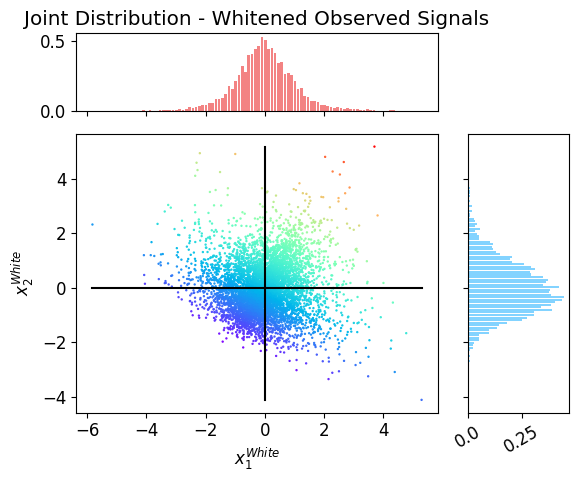

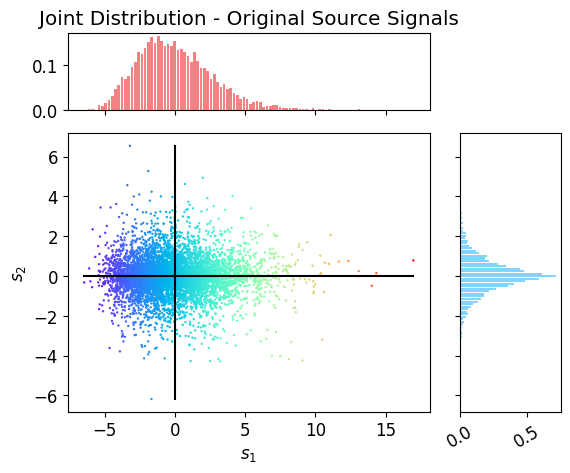

In [7]:
# Normalizing variances of the principal components and rotating to the original coordinate system
x_white = np.dot(U, np.dot(D_inv_sqrt, x_pca))

# Covariance matrix
covX_white = np.around(np.cov(x_white),3)
print("\n\n\t Covariance Matrix After Whitening\n\t\t", covX_white[0], "\n\t\t", covX_white[1])

# Plotting the whithened observations
decW.plot_sources_and_observations(x_white[0,:], x_white[1,:], "Joint Distribution - Whitened Observed Signals", "observations White")

# Plotting joint distribution of the original source signals
decW.plot_sources_and_observations(s1, s2, "Joint Distribution - Original Source Signals", "sources")

&emsp;&ensp; Now is your turn, implement in the code cell below a python function that receives the observation signals $𝒙$ and returns the whitened observations $𝒛$. The code cell below shows the template of how to create a function in python with several arguments and return several variables.

In [ ]:
# Implement your code here

In [ ]:
def function_name(argument_1, argument_2):
  
  # TODO: Implement PCA Whitening that generates the Python variable z corresponding to the whitened observations. The alpha variable is a dummy variable.
  z = 0
  alpha = 0

  return z, alpha

## Independent Component Analysis (ICA)

&emsp;&ensp; Following the discussion, ICA aims to find a representation of the data where the new random variables, named independent components, are as independent as possible. Please refer to the code cell below and note that the distribution of the estimated sources may be rotated compared to the original one; this is due to the indeterminacy of occurrence order. While it may sound confusing to say "more independent as possible," in general, it is not possible to find a representation where the components are truly independent in practical situations. However, this does not hinder the use of ICA for analyses since it is supported by another important assumption:

> * The probability distribution of the sources $s_j, j=1,\cdots,N$ must be non-Gaussian. In fact, there may be no more than one Gaussian source [(COMON; JUTTEN, 2010; HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references).

&emsp;&ensp; To understand why this assumption must be satisfied, go to the [initial code cell](#scrollTo=yPFBhMSPRwZ-) and let the sources be Gaussian distributions. In other words, define the `s1` and `s2` variables as random variables by removing the $\#$ symbol from the lines of code that contain `np.random.normal`, and then run all code cells in sequence. You will observe that after PCA and whitening, the $z_i$ variables in $𝒛$ are both Gaussian. As ICA finds an orthogonal transformation and applies it to $𝒛$, the new random variables will also be Gaussian (to see this, execute the code cells below). Consequently, we cannot claim that they are the "true" estimation of the sources because we can continue applying orthogonal transformations, and the variables will remain Gaussian. In other words, we have infinite solutions to the problem, and any of them can be a good estimation of the "true" sources. Note that the location and colors of the points in the figure below, compared to the one generated [here](#scrollTo=yPFBhMSPRwZ-), may differ. It is highly probable that the points are not in the same coordinates, so the estimated sources are not equal to the sources (whose positions we knew). In practical situations, we may not ensure certainty about the estimated sources.


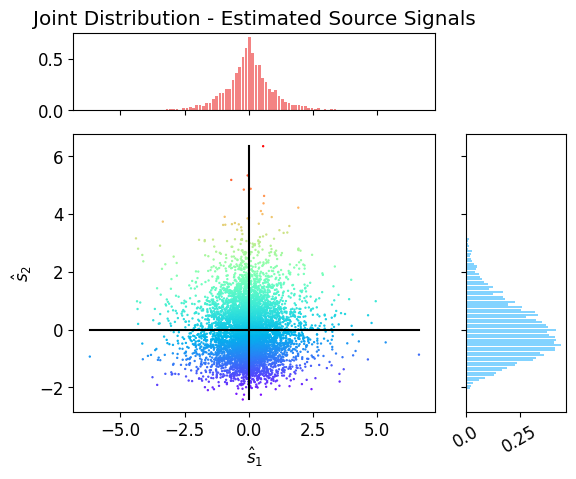

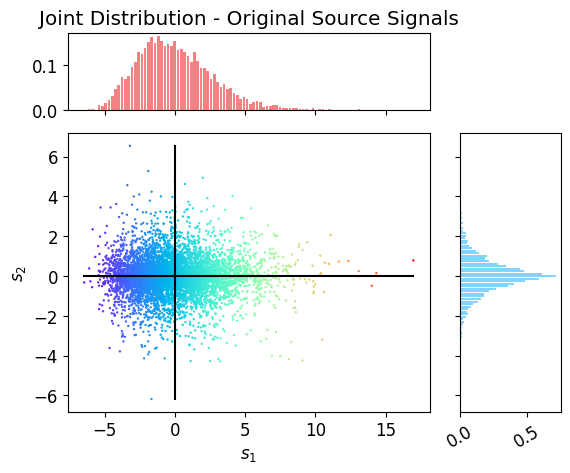

In [8]:
# Show the ICA effect on the graph

# Computing the separaion matrix
B = decW.fastICA(x_white, M = 2, max_iter = 50, Tolx = 0.0001, cost = 3)

# Estimating the independent components (the sources)
s_est = np.dot(B.T, x_white)

# Plotting joint distribution of the estimated source signals
decW.plot_sources_and_observations(s_est[0,:], s_est[1,:], "Joint Distribution - Estimated Source Signals", "estimated sources")

# Plotting joint distribution of the original source signals
decW.plot_sources_and_observations(s1, s2, "Joint Distribution - Original Source Signals", "sources")

> * We could define ICA as follows: _**assuming the sources $s_i, j=1,...,N$ are statistically independent, have a non-Gaussian distribution, and unit variance, the ICA finds an orthogonal linear transformation given by a matrix $𝑩$ so that the estimates of the sources, $\widehat{s_j}$, are as independent as possible**_.

&emsp;&ensp; To find the sources, ICA uses cost functions that measure the non-Gaussianity and the statistical independence of the estimated sources, attempting to maximize these functions. It is a numerical optimization problem. ICA can be formulated by measuring non-Gaussianity using kurtosis [(HYVÄRINEN; KARHUNEN; OJA, 2001; HYVÄRINEN; OJA, 1997)](#scrollTo=references) or negentropy [(HYVÄRINEN; KARHUNEN; OJA, 2001; HYVÄRINEN, 1999)](#scrollTo=references). Here, we will apply negentropy because kurtosis lacks robustness and can be very sensitive to outliers. Thus, other measures of non-Gaussianity, like negentropy, might be better in some situations [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). Regarding independence, ICA can be formulated based on mutual information, which can be seen as a natural measure for independence [(HYVÄRINEN; KARHUNEN; OJA, 2001; HYVÄRINEN, 1999)](#scrollTo=references). In [(HYVÄRINEN, 1999)](#scrollTo=references), mutual information is expressed in terms of negentropy, since both are expressed in terms of entropy. To minimize mutual information (maximize independence) among random variables is mathematically equivalent to maximizing negentropy (maximize non-Gaussianity).

### FastICA Algorithm Based on Negentropy and Mutual Information

#### Negentropy
&emsp;&ensp; The negentropy is a **measure of non-gaussianity** based on the concept of differential entropy. It is a measure of how much the entropy of a random variable is distant from the entropy of a gaussian variable, considering both with equal mean and variance. So, the more distant the entropy of the estimation is from the same measures for the Gaussian variable, more non-gaussian the estimated source is. When we use random vectors, we can define the entropy of the random vector as $𝒚=[y_1, \cdots, y_n]^T$ (where $y_i$ are random variables) in terms of the differential entropy [Equation 8](#eq8), where $H(𝒚)$ is the joint entropy and $f(𝒚)$ is the probabilty density function of $𝒚$, or it can be seen as the joint probabilty density function of the random variabels $y_1,\cdots,y_n$ [(HYVÄRINEN, 1999)](#scrollTo=references). A fundamental result of information theory based on the principle of maximum entropy affirms that a gaussian variable has the largest entropy among all random variables of equal variance and mean [(HYVÄRINEN, 1999; HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references).

<a name='eq8'></a>
$$\begin{array}{cc} H(𝒚) = H(y_1,\cdots,y_n) = -\int f(𝒚) log(f(𝒚)) d𝒚 & (8) \end{array}$$

&emsp;&ensp; Since we have ensured that our estimated sources have null mean (by centering the observations) and unit variance (by constraining the norm of the separation vectors to unity), this means that we can use entropy as a measure of non-Gaussianity. So, to obtain a measure of non-Gaussianity that is zero for a Gaussian variable and always non-negative, we can use a "normalized" version of the differential entropy called negentropy, [Equation 9](#eq9), where $𝒚_{\text{gauss}}$ is a Gaussian random variable with the same covariance matrix as $𝒚$ [(HYVÄRINEN, 1999)](#scrollTo=references).

<a name='eq9'></a>
$$\begin{array}{cc} J(𝒚) = H(𝒚_{gauss}) - H(𝒚) & (9) \end{array}$$
&emsp;
 
#### Mutual Information

&emsp;&ensp; Up until this moment, only measures of non-Gaussianity have been presented, but what about the measures of independence? Mutual Information, [Equation 10](#eq10), is a natural **measure of independence**. Mutual information is based on entropy and tells you how much information you have about a random variable by observing another one. Therefore, if there isn't any information, the variables are statistically independent. Note that if the random variables $y_1, \cdots, y_n$ are mutually independent, the joint entropy in [Equation 9](#eq9) can be rewritten as a sum of the entropy of each individual variable. This is due to the fact that 1) the joint PDF satisfies $f(𝒚) = f(y_1) f(y_2) \cdots f(y_n)$, 2) the logarithm of a product is the sum of the logarithms, and 3) the integral is a linear operator. Thus, the first and second terms on the right of [Equation 10](#eq10) are equal, and $I(y_1, \cdots, y_n) = 0$. This is the idea of ICA; it minimizes the Mutual Information of the data to find the most independent sources as possible.

<a name='eq10'></a>
$$I(𝒚) = I(y_1,\cdots,y_n) = \Big[ \sum_{j=1}^n H(y_j) \Big] - H(𝒚), \begin{array}{ccr} & I(𝒚) \ge 0 & (10) \end{array} $$

&emsp;&ensp; Consider that the random variables $y_j$ can represent the estimated sources and the Gaussian random variables $y_j^{\text{gauss}}$, both with unit variance, null mean, and uncorrelated (remember that just for Gaussian variables, uncorrelation implies independence). Since $y_j^{\text{gauss}}$ are independent, we saw from the last paragraph that $ H(𝒚^{\text{gauss}}) = \sum_{j=1}^n H(y_j^{\text{gauss}}) $, so we can add $ H(𝒚^{\text{gauss}}) $ to both sides of [Equation 10](#eq10) without changing it, see [Equation 11](#eq11). Note the similarity of the terms in [Equation 11](#eq11) with the definition of negentropy, [Equation 9](#eq9). _**This means that Mutual Information can be rewritten in terms of negentropy as in [Equation 12](#eq12) [(HYVÄRINEN, 1999)](#scrollTo=references), so the measure of statistical independence can be computed by a measure of non-Gaussianity**_.

<a name='eq11'></a>
$$ \begin{array}{ccr} I(𝒚) + \sum_{j=1}^n H(y^{gauss}_j) = \Big[ \sum_{j=1}^n H(y_j) \Big] - H(𝒚) +  H(𝒚^{gauss})  \\ I(𝒚) = \Big[ \sum_{j=1}^n H(y_j) - H(y^{gauss}_j) \Big] +  H(𝒚^{gauss}) - H(𝒚)  & (11) \end{array} $$

<a name='eq12'></a>
$$I(𝒚) = I(y_1,\cdots,y_n) = J(𝒚) - \Big[ \sum_{j=1}^n J(y_j) \Big] \begin{array}{cr}  & (12) \end{array} $$

&emsp;&ensp; So, as performed in [Equation 10](#eq10), if the random variables $y_1, \cdots, y_n$ are mutually independent, both the joint entropy in [Equation 8](#eq8) as well as the mutual negentropy in [Equation 9](#eq9) can be rewritten as a sum of the entropy (negentropy) of each individual variable. The first and second terms on the right of [Equation 12](#eq12) are equal, and $I(y_1, \cdots, y_n) = 0$. For more information on the mathematical expressions, we recommend checking the following reference [(COMON, 1994)](#scrollTo=references).

> * _**Hence, since the negentropy assumes non-zero values, it is easy to note that minimizing $I(𝒚)$ corresponds to maximizing the sum of the individual negentropies [(HYVÄRINEN, 1999; HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). In other words, the maximization of statistical independence among the estimated sources is achieved by maximizing the non-Gaussianity of each individual estimated source**_.

&emsp;&ensp; As the computation of negentropy is difficult, some approximations based on new contrast functions can be performed [(HYVÄRINEN, 1998, 1999)](#scrollTo=references). Since the estimated source is $\widehat{s_j} = 𝒘_j^T𝒛$, and the separation vector $𝒘_j$ is the one to be found, the approximated negentropy is a function of it and can be represented in [Equation 13](#eq13), where $G(\cdot)$ is practically any non-quadratic function [(HYVÄRINEN, 1999)](#scrollTo=references). Hence, considering [Equation 12](#eq12) where minimizing $I(𝒚)$ corresponds to maximizing the sum of the individual $J(𝒘_j)$, and maximizing this sum is the same as maximizing each individual negentropy (because it is a non-negative measure), the problem is to maximize [Equation 13](#eq13) under the constraint $\| 𝒘_j \| = 1$. [HYVÄRINEN (1999)](#scrollTo=references) suggested some equations to be used in $G(\cdot)$; some suggestions can be found in the set of [Equations 14](#eq14).

<a name='eq13'></a>
$$\begin{array}{cc} J(𝒘_j) = [ E\{G(𝒘_j^T 𝒛)\} - E\{G(y_{gauss})\}]^2 & (13) \end{array}$$
$$$$
<a name="eq14"></a>
$$\begin{array}{cr} G_1(k) = ln(cosh(k)) & \\ G_2(k) = exp(-k^2/2) & (14) \\ G_3(k) = k^4/4 & \end{array}$$

&emsp;&ensp; To maximize [Equation 13](#eq13), a gradient-based algorithm can be applied. However, the speed of convergence of these algorithms is slow. Then, after some simplifications and assumptions in [(HYVÄRINEN, 1999; HYVÄRINEN; OJA, 1997)](#scrollTo=references), a fixed-point algorithm was developed where $𝒘_j(n)$ is the separation vector on the $n$-th iteration. The final FastICA algorithm that maximizes the negentropy or minimizes the Mutual Information is below, where $g(\cdot)$ and $g'(\cdot)$ are the first and second derivatives of $G(\cdot)$, respectively, as expressed in [Equations 15](#eq15). Note that if you choose $G(k) = k^4/4$, the algorithm below is identical to the algorithm based on kurtosis in [(HYVÄRINEN; OJA, 1997)](#scrollTo=references) because kurtosis is the fourth moment.

<a name="eq15"></a>
$$\begin{array}{ccr} g_1(k) = tanh(k) & g'_1(k) = 1 - {tanh}^2(k) & \\ g_2(k) = -k \text{ } exp(-k^2/2) & g'_2(k) = (k^2 - 1) \text{ } exp(-k^2/2) & (15) \\ g_3(k) = k^3 & g'_3(k) = 3k^2 & \end{array}$$

&emsp;&ensp; Now it's your turn! You must implement a function that corresponds to the algorithm below. Create a way of choosing which $G(\cdot)$ function gives better performance and use this function in the separation vector computation. In your code, consider the "if statement" in step 5 as follows: if $|\mathbf{w}_j(n)^T\mathbf{w}_j(n-1)| \ge 0.9999$ or $n \ge 40$. The $n \ge 40$ condition in the "if statement" is used to avoid an infinite loop.

&emsp;&ensp; $\bullet$ Apply PCA and Whitening on $𝒙$ to obtain $𝒛$;

&emsp;&ensp; $\bullet$ Initialize the separation matrix $𝑩$ as an empty matrix;

&emsp;&ensp; $\bullet$ Choose one of the $G(\cdot)$ functions in [Equations 14](#eq14) and use their corresponding derivatives in [Equations 15](#eq15);

&emsp;&ensp; $\bullet$ For $j=1,\ldots,M$, do:

&emsp;&ensp;&emsp;&ensp; $1.$ Initialize vector $𝒘_j(0)$ randomly with unit norm and set $n \gets 1$;

&emsp;&ensp;&emsp;&ensp; $2.$ $𝒘_j(n) \gets E \{ 𝒛 g(𝒘_j^T(n-1) 𝒛) \} - E\{g'(𝒘_j^T(n-1) 𝒛)\}𝒘_j(n-1)$

&emsp;&ensp;&emsp;&ensp; $3.$ $𝒘_j(n) \gets 𝒘_j(n) - 𝑩 𝑩^T 𝒘_j(n)$;

&emsp;&ensp;&emsp;&ensp; $4.$ $𝒘_j(n) \gets 𝒘_j(n) / \| 𝒘_j(n) \|$;

&emsp;&ensp;&emsp;&ensp; $5.$ If $|𝒘_j(n)^{T}𝒘_j(n-1)|$ is not close enough to 1, do: $n \gets n+1$ and go back to step 2;

&emsp;&ensp;&emsp;&ensp; Else, add $𝒘_j(n)$ as the $j$-th column of $𝑩$;

&emsp;&ensp; $\bullet$ Get the estimated sources by $\widehat{𝒔} = 𝑩^T 𝒛$

In [ ]:
# Implement your code here

In [ ]:
# Here are some tips for your code

M = 20

# A matrix with dimensions 10xM with empty values (in reality are float point values near zero)
A = np.empty((10, M))
# B matrix with dimensions Mx(M+10) with zero values
B = np.zeros((M, M+10))

# For loop structure
for j in range(M):
  # TODO: You should add some code here to complete the loop
  pass # remove this line

# If, elif, and else statements
if M < 10:
  # TODO: Add code for the first condition
  pass # remove this line
elif M <= 20:
  # TODO: Add code for the second condition
  pass # remove this line
elif M//2 == 0 or M*5 > 100:
  # TODO: Add code for the third condition
  pass # remove this line
elif M%2 == 1 and M > 20:
  # TODO: Add code for the fourth condition
  pass # remove this line
else:
  # TODO: Add code for the else condition
  pass # remove this line

# Creating an array of 100 elements, each of them being a random sample from a uniform distribution over [0, 1)
x = np.random.rand(100)

# Representative vector of M elements equal to one
x_ones = np.ones(M)

# Transposing
x_transpose = x.reshape((1, -1))
B_transpose = B.T

# Elements of the array powered by 2
x_squared = x ** 2
x_squared = np.square(x)

# Elements of the array powered by alpha
alpha = 4.23
x_powered = x ** alpha
x_powered = np.power(x, alpha)

# Applying mathemtical equation to the elements of an array/matrix
def function(x):
  return x*x - 2*x + 1/x - x/10

x = function(x)

# Get the mean of an array
mean1 = x.mean()
mean1 = np.mean(x)

# Get the mean of a matrix
mean2 = B.mean() # considering all elements

# Get the mean of elements in a column: we must tell Python that it must ITERATE OVER ROWS,
# i.e., it must vary the row numbers for a fixed column to compute the mean of that column.
# The rows of a matrix are the first dimension of this matrix, or the first axis. But in Python,
# indexing begins at 0, unlike Matlab that begins at 1, and this is the reason to use
# axis=0 below.
mean2 = B.mean(axis=0)

# Get the mean of elements in a row: we must tell Python that it must ITERATE OVER COLUMNS,
# i.e., it must vary the column numbers for a fixed row to compute the mean of that row.
# The columns of a matrix are the second dimension of this matrix, or the second axis. But in Python,
# indexing begins at 0; this is the reason to use axis=1 below.
mean2 = B.mean(axis=1)

# Absolute value
alpha = abs(-0.452)
alpha = np.absolute(1.34-4.323)

# Norm of a vector
my_norm = np.linalg.norm(x)

# Norm of a matrix
my_norm = np.linalg.norm(B) # Frobenius norm

# Matricial operations
xx = np.dot(x,x)
xx = np.dot(x,x.T)
xx = np.dot(x.T,x)

Ax = np.dot(A,x_ones)
Ax = A @ x_ones

this_is_an_error = x @ A
this_is_an_error= np.dot(x,A)

AB = np.dot(A,B)
AB = A @ B

BA = np.dot(B.T,A.T)
BA = B.T @ A.T

this_is_an_error = np.dot(B.T,A)
this_is_an_error = B @ A.T

# Adding a vector as a column or a row of a matrix
# The vector dimensions must be compatible to the dimension of the matrix that it will be inserted
# Moreover, vectors in python are column matrices
B = np.zeros((100,200))
w = np.ones(100)
y = np.ones(200)

# Adding an array to the first column of B. Note that w has the same number of elements of each column of B
A[:,0] = w
# Adding an array to the N-th column of B
N = 54 # could be any number in [1,200]
A[:,N-1] = w

# Adding an array to the fourth row of B. Note that w has the same number of elements as each column of B
A[:,3] = y.T # will give an error
A[:,3] = y.reshape(1,-1)
# Note: Here, the transpose method will not work because Python considers any array with 1 dimension a column vector.
# The dimension is indicated by the open and close brackets. So, once you say a vector is one-dimensional, to be able
# to use it as a column or row matrix, you need to change the shape of this array. This is what the ".reshape(1,-1)" is doing.
# The ".reshape(1,-1)" is telling Python, "this array now has 1 row and -1 columns." Wait, WHAT??? -1 columns??? Calm down,
# Python interprets the -1 as the number of columns needed to transform this array into a row matrix. For example, in some
# situations, the code only knows the dimensions of data when it is running, like the number of elements in the array that
# contains the time samples of the EMG recording. The length of this array will depend on the sampling frequency and the total
# recording duration. So when you tell Python to use -1, it will count the number of elements in this array and will construct
# a row matrix with the same number of columns to contain all elements.

# Adding an array to the N-th row of B
N = 63 # could be any number in [1,100]
A[:,N-1] = y.reshape(1,-1)

## High-Density EMG Decomposition Panel

&emsp;&ensp; We have created another notebook that explains all the steps involved in the full decomposition processing that we use. To launch this notebook, click [here](https://colab.research.google.com/github/MateusASchneiderCastilhos/EMG_Crosstalk_Decomposition_Workshop/blob/main/Decomposition_Panel.ipynb).

## Funding

Part of this project was funded by [CNPq](http://www.cnpq.br/) (Brazilian National Science Foundation): proc. no. 131390/2021-0.

Part of this study was funded by [FAPESP](https://fapesp.br/) (São Paulo Research Foundation): proc. no. 2019/01508-4.

## References

1. COMON, P. Independent component analysis, A new concept?. *Signal Processing*, v. 36, n. 3, p. 287–314, 1994. DOI: [10.1016/0165-1684(94)90029-9](https://doi.org/10.1016/0165-1684(94)90029-9).

2. COMON, P.; JUTTEN, C. Handbook of Blind Source Separation Independent Component Analysis and Applications. First ed. Oxford: *Elsevier*, 2010.

3. HYVÄRINEN, A. New approximations of differential entropy for independent component analysis and projection pursuit. *10th International Conference on Neural Information Processing Systems 1997*, Cambridge, MA, United States, MIT Press, 1997. p. 273–279.

4. HYVÄRINEN, A. Fast and robust fixed-point algorithms for independent component analysis. *IEEE Transactions on Neural Networks*, v. 10, n. 3, p. 626–634, 1999. DOI: [10.1109/72.761722](https://doi.org/10.1109/72.761722).

5. HYVÄRINEN, A.; KARHUNEN, J.; OJA, E. Independent Component Analysis. First ed. New York: *John Wiley & Sons*, 2001.

6. HYVÄRINEN, A.; OJA, E. A Fast Fixed-Point Algorithm for Independent Component Analysis. *Neural Computation*, v. 9, p. 1483–1492, 1997. DOI: [10.1109/ICICIP.2010.5564273](https://doi.org/10.1109/ICICIP.2010.5564273).

7. HYVÄRINEN, A.; OJA, E. Independent component analysis: algorithms and applications. *Neural Networks*, v. 13, p. 411–430, 2000. DOI: [10.7819/rbgn.v19i63.1905](https://doi.org/10.7819/rbgn.v19i63.1905).